See https://www.youtube.com/watch?v=6SlgtELqOWc

In [1]:
import numpy as np
import tensorflow as tf
from my_utils import load_mnist_data
from matplotlib import pyplot as plt
from time import time

/Users/ildukim/Projects/mnist/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train_images, train_labels, test_images, test_labels = load_mnist_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


it tooks 9.633760929107666 sec


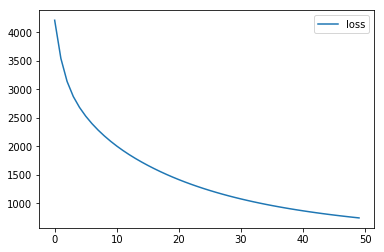

In [4]:
learning_rate = 1e-3
loss_history = []

x = tf.placeholder(tf.float32, [None, 784])
W = tf.placeholder(tf.float32, [784, 10])
b = tf.placeholder(tf.float32, [10])
y = tf.placeholder(tf.float32, [None, 10])

y_ = tf.matmul(x, W) + b
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))

grad_W, grad_b = tf.gradients(loss, [W, b])

start = time()
# <--
with tf.Session() as sess:
    values = {
        x: train_images,
        W: np.random.randn(784, 10),
        b: np.zeros(10),
        y: train_labels
    }
    
    for i in range(50): 
        loss_val, grad_W_val, grad_b_val = sess.run([loss, grad_W, grad_b], values)
        values[W] -= learning_rate * grad_W_val
        values[b] -= learning_rate * grad_b_val 
        loss_history.append(loss_val)
# -->        
finish = time()

print(f'it tooks {finish - start} sec')
plt.plot(loss_history, label='loss')
plt.legend()
plt.draw()

it tooks 7.006709098815918 sec


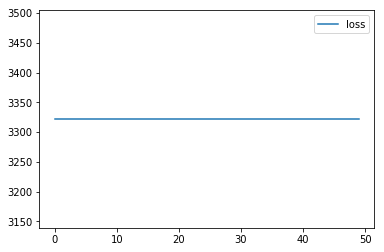

In [5]:
learning_rate = 1e-3
loss_history = []

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.placeholder(tf.float32, [None, 10])

y_ = tf.matmul(x, W) + b
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))

grad_W, grad_b = tf.gradients(loss, [W, b])
new_W = W.assign(W - learning_rate * grad_W)
new_b = b.assign(b - learning_rate * grad_b)

start = time()
# <--
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {
        x: train_images,
        y: train_labels
    }
    
    for i in range(50): 
        loss_val = sess.run(loss, values)
        loss_history.append(loss_val)
finish = time()
# -->

print(f'it tooks {finish - start} sec')
plt.plot(loss_history, label='loss')
plt.legend()
plt.draw()

it tooks 9.951682806015015 sec


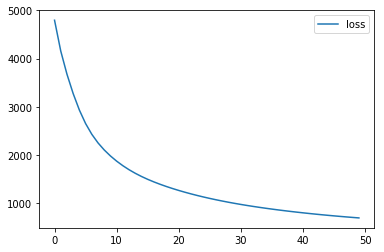

In [6]:
learning_rate = 1e-3
loss_history = []

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.placeholder(tf.float32, [None, 10])

y_ = tf.matmul(x, W) + b
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))

grad_W, grad_b = tf.gradients(loss, [W, b])
new_W = W.assign(W - learning_rate * grad_W)
new_b = b.assign(b - learning_rate * grad_b)

start = time()
# <--
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {
        x: train_images,
        y: train_labels
    }
    
    for i in range(50): 
        loss_val, _, _ = sess.run([loss, new_W, new_b], values)   
        loss_history.append(loss_val)
# -->        
finish = time()

print(f'it tooks {finish - start} sec')
plt.plot(loss_history, label='loss')
plt.legend()
plt.draw()

it tooks 9.438734292984009 sec


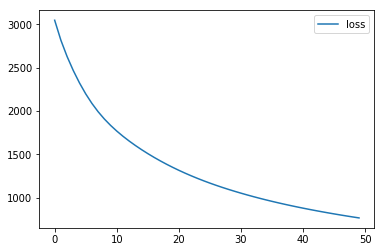

In [7]:
learning_rate = 1e-3
loss_history = []

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.placeholder(tf.float32, [None, 10])

y_ = tf.matmul(x, W) + b
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))

grad_W, grad_b = tf.gradients(loss, [W, b])
new_W = W.assign(W - learning_rate * grad_W)
new_b = b.assign(b - learning_rate * grad_b)
updates = tf.group(new_W, new_b)

start = time()
# <--
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {
        x: train_images,
        y: train_labels
    }
    
    for i in range(50): 
        loss_val, _ = sess.run([loss, updates], values)   
        loss_history.append(loss_val)
# -->        
finish = time()

print(f'it tooks {finish - start} sec')
plt.plot(loss_history, label='loss')
plt.legend()
plt.draw()

it tooks 14.155382871627808 sec


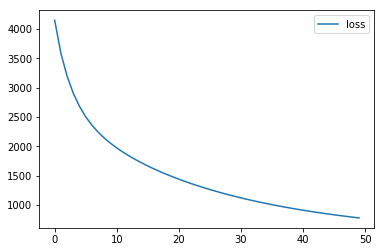

In [8]:
learning_rate = 1e-3
loss_history = []

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.placeholder(tf.float32, [None, 10])

y_ = tf.matmul(x, W) + b
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
updates = optimizer.minimize(loss)

start = time()
# <--
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {
        x: train_images,
        y: train_labels
    }
    
    for i in range(50): 
        loss_val, _ = sess.run([loss, updates], values)   
        loss_history.append(loss_val)
# -->        
finish = time()

print(f'it tooks {finish - start} sec')
plt.plot(loss_history, label='loss')
plt.legend()
plt.draw()